# Visualizing Distributions of Generated Molecules

In [1]:
import os
print('Current conda environment:', os.environ['CONDA_DEFAULT_ENV'])

import warnings
warnings.filterwarnings('ignore')

import random
random.seed(42)

Current conda environment: reinvent4


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

from rdkit import Chem
from rdkit.Chem import AllChem

sns.set(rc = {'figure.figsize':(15,8)})

In [3]:
df = pd.read_csv('../data/dataframe.csv')

In [4]:
df.head()

,Unnamed: 0,SMILES,Input_SMILES,Tanimoto,Name,Success,ID,Docking score
0,0,CN1CCc2cncnc21,c1ncc2c(n1)NCC2,0.435897,MOL0000,False,MOL0000,-5.911569
1,1,c1ncc2c(n1)CCNC2,c1ncc2c(n1)NCC2,0.500000,MOL0001,False,MOL0001,-5.744287
2,2,c1ncc2c(n1)CNCC2,c1ncc2c(n1)NCC2,0.540541,MOL0002,False,MOL0002,-5.669346
3,3,c1ncc2c(n1)NCC2,c1ncc2c(n1)NCC2,1.000000,MOL0003,True,MOL0003,-6.471065
4,4,CC1CNc2ncncc21,c1ncc2c(n1)NCC2,0.435897,MOL0004,True,MOL0004,-6.683917


In [5]:
smiles = df['SMILES'].to_numpy()

In [6]:
mols = [Chem.MolFromSmiles(smile) for smile in smiles]

In [7]:
fpgen = AllChem.GetMorganGenerator()

In [8]:
fingerprints = np.array([fpgen.GetFingerprint(mol).ToList() for mol in mols])

In [9]:
X = fingerprints

pca = PCA(n_components=3, random_state=0)
pca_fps = pca.fit_transform(X)

In [10]:
df['PC1'], df['PC2'], df['PC3'] = pca_fps.T[0], pca_fps.T[1], pca_fps.T[2]


In [11]:
success = df[df['Success']]
failed = df[~df['Success']]

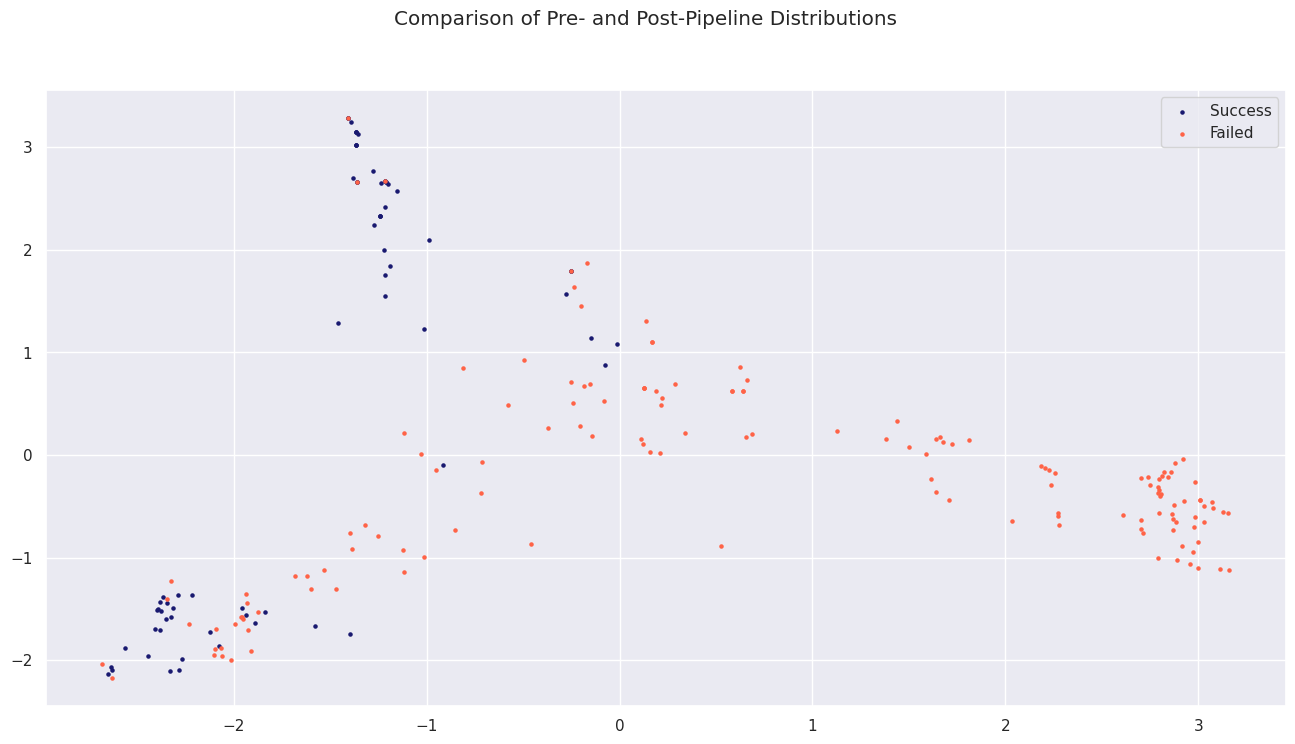

In [12]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,8))

ax.scatter(success['PC1'], success['PC2'], s=5, c='midnightblue', label='Success')
ax.scatter(failed['PC1'], failed['PC2'], s=5, c='tomato', label='Failed')

ax.legend()

fig.suptitle('Comparison of Pre- and Post-Pipeline Distributions');

### 3D PCA

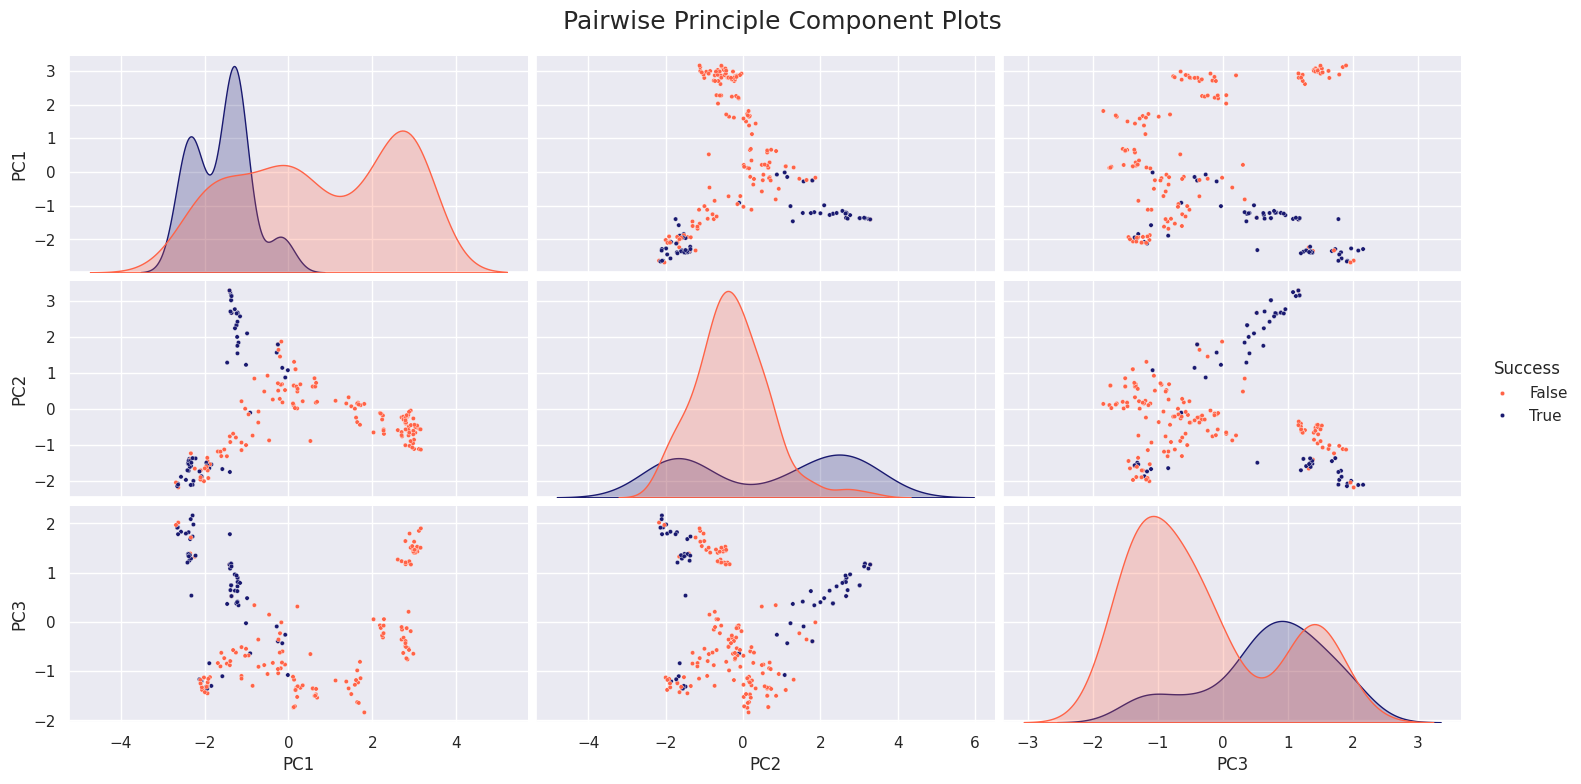

In [13]:
f = sns.pairplot(df,
                 hue='Success',
                 vars=['PC1', 'PC2', 'PC3'],
                 palette=['tomato', 'midnightblue'],
                 aspect=2,
                 plot_kws=dict(s=10))

f.fig.suptitle('Pairwise Principle Component Plots', fontsize=18, y=1.04);

### t-SNE w/ PCA preprocessing

In [14]:
p = 100

pca_model = PCA(n_components=30, random_state=0)
tsne_model = TSNE(n_components=2, random_state=0, perplexity=p, n_iter=5000)
tsne_fps = tsne_model.fit_transform(pca_model.fit_transform(X))

In [15]:
df['TSNE1'] = tsne_fps.T[0]
df['TSNE2'] = tsne_fps.T[1]

Text(0.5, 1.06, 't-SNE components ($p=100$)')

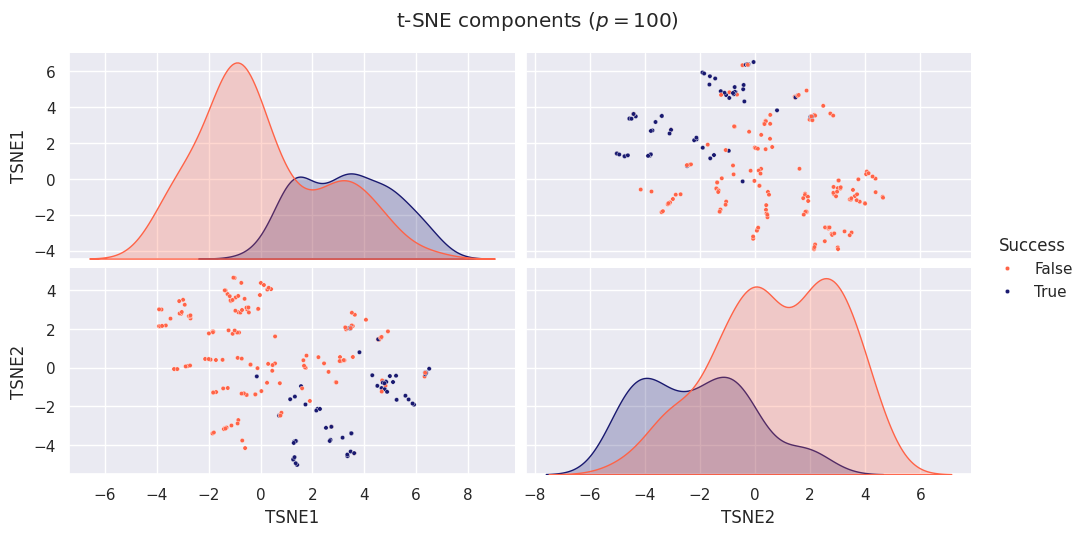

In [16]:
f = sns.pairplot(df,
                 hue='Success',
                 vars=['TSNE1', 'TSNE2'],
                 palette=['tomato', 'midnightblue'],
                 aspect=2,
                 plot_kws=dict(s=10))

f.fig.suptitle('t-SNE components ($p=100$)', y=1.06)